#  Classification model for predicting customer churn for SyriaTel


# Business Understanding
SyriaTel, a telecommunications company, is experiencing customer churn, which means customers are stopping their service and going to competitors. This leads to lost revenue and potential decline in market share. It wants to reduce customer churn to increase their revenue and customer retention. By predicting which customers are likely to leave, SyriaTel can take proactive measures to retain them.

## Problem Statement
SyriaTel wants to reduce customer churn to increase their revenue and customer retention. By predicting which customers are likely to leave, SyriaTel can take proactive measures to retain them.

## Objectives
1. To develop a churn prediction model that accurately predicts customers at a high risk of churning,
2. To identify key factors influencing churn.
3. To reduce customer churn rate.

## Metrics of Success
- Accuracy: The percentage of correctly predicted churned and non-churned customers.
- Precision: The proportion of customers predicted to churn who actually churn.
- Recall: The proportion of actual churned customers identified by the model.
- F1-score: A harmonic mean of precision and recall, balancing both metrics.

## Conclusion 
By building a churn prediction model and analyzing customer data, we can provide valuable insights to SyriaTel to improve customer retention strategies.  This will lead to reduced churn rates, increased customer loyalty, and a stronger competitive position in the market.


# Data Understanding

The dataset is sourced from Kaggle.

We will then check for missing values, duplicates, placeholders, outliers and convert datatypes

In [308]:
#Load the data
churn_data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

#Display the first 5 rows
churn_data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Summary of the datasets features.

- State: The state where the customer resides.
- Account Length: The number of days the customer has maintained an account.
- Area Code:T he customer's area code.
- Phone Number: The customer's phone number.
- International Plan: Indicates if the customer is subscribed to the international plan or not.
- Voice Mail Plan: Indicates if the customer is subscribed to the voice mail plan or not.
- Number Vmail Messages: The count of voicemail messages sent by the customer.
- Total Day Minutes: The total number of minutes the customer spent on calls during the day.
- Total Day Calls: The total number of calls made by the customer during the day.
- Total Day Charge: The total charges incurred by the customer for daytime calls.
- Total Eve Minutes: The total number of minutes the customer spent on calls during the evening.
- Total Eve Calls: The total number of calls made by the customer during the evening.
- Total Eve Charge: The total charges incurred by the customer for evening calls.
- Total Night Minutes: The total number of minutes the customer spent on calls during the night.
- Total Night Calls: The total number of calls made by the customer during the night.
- Total Night Charge: The total charges incurred by the customer for nighttime calls.
- Total Intl Minutes: The total number of minutes the customer spent on international calls.
- Total Intl Calls: The total number of international calls made by the customer.
- Total Intl Charge: The total charges incurred by the customer for international calls.
- Customer Service Calls: The number of calls made by the customer to customer service.
- Churn: Indicates if the customer has ended their contract or not.

In [309]:
# Call fuction to explore the dataset
f.explore_dataset(churn_data)

Data Shape:
Number of Rows: 3333
Number of Columns: 21

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes

It contains 3333 entries and 21 columns. 

We have concluded that there are no missing values and duplicates


In [310]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [311]:
# Check for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_value = {}
for col in columns:
    unique_value[col] = churn_data[col].unique()
unique_value

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

There are no placeholders.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

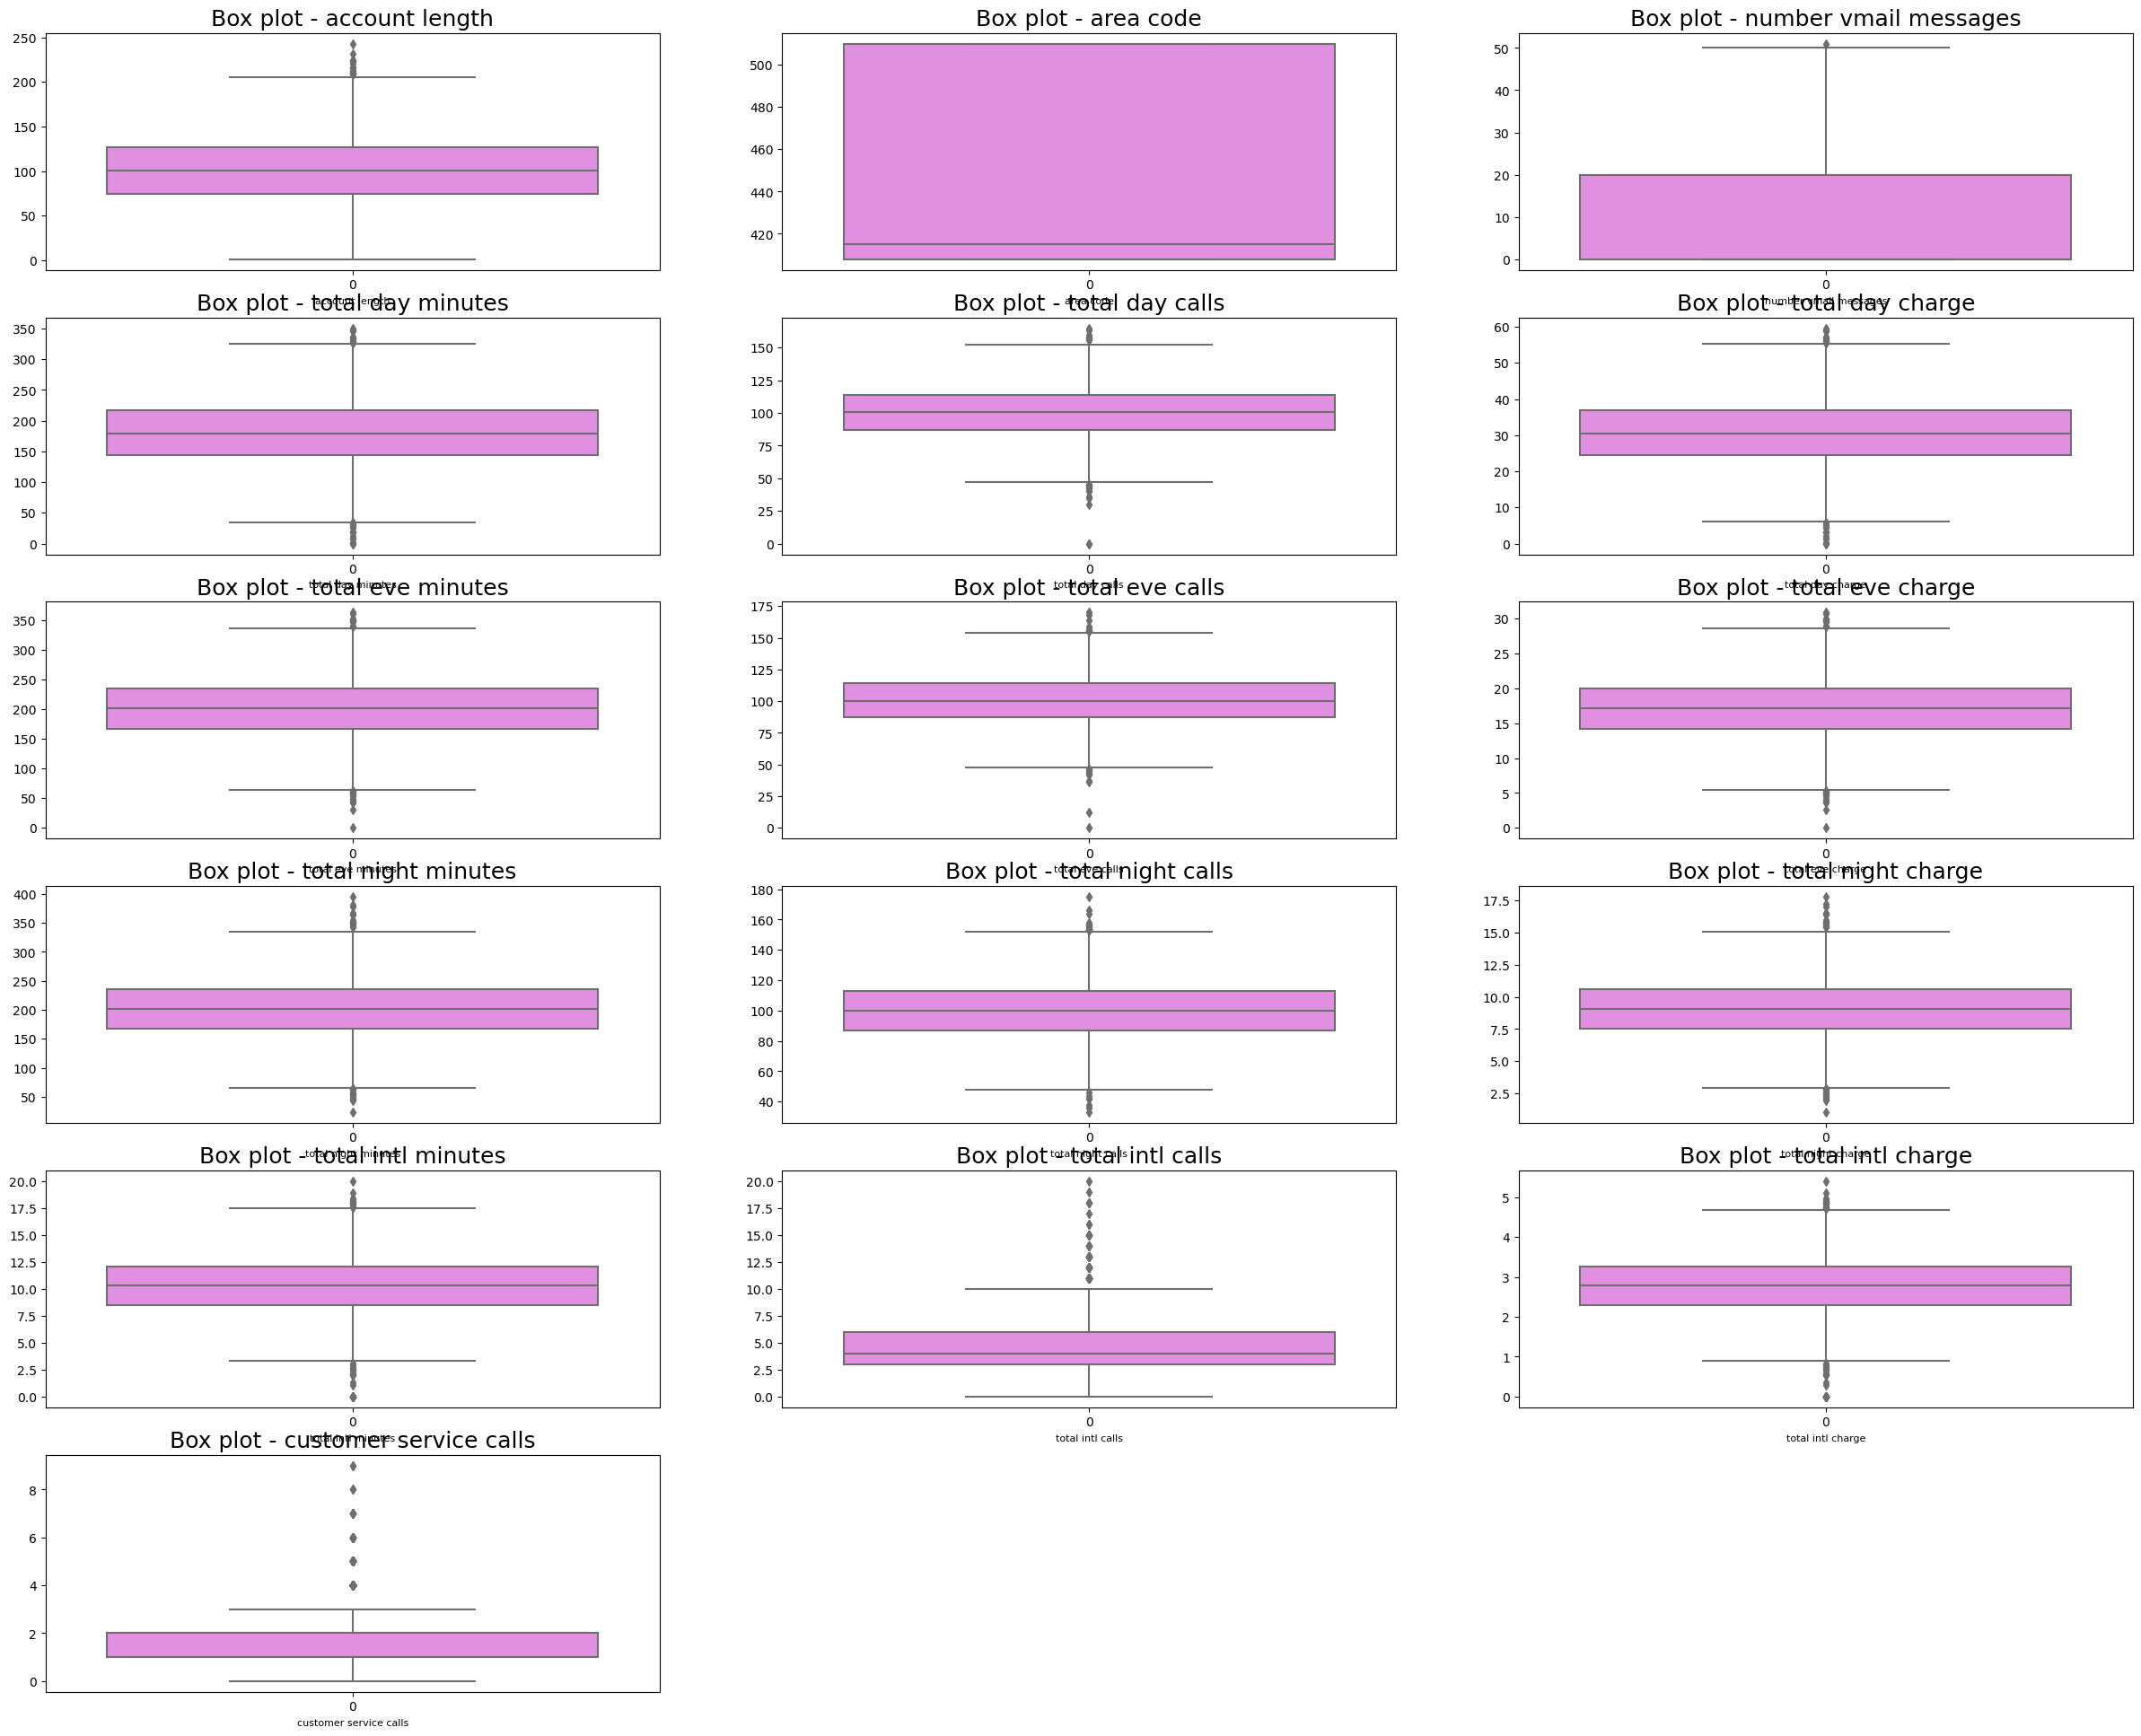

In [312]:
# Check for outliers
# Create a list of columns with numeric values
numeric_col = churn_data.select_dtypes('number').columns

# Calculate number of rows and columns for subplots
num_row = (len(numeric_col) - 1) // 3 + 1
num_col = min(len(numeric_col), 3)

# Create subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(10*num_col, 4*num_row))

# Generate box plots for each numeric column
for i, column in enumerate(numeric_col):
    row = i // num_col
    col = i % num_col
    sns.boxplot(data=churn_data[column], ax=axes[row, col], color='violet')
    axes[row, col].set_title(f'Box plot - {column}', fontsize=18)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove empty subplots
if i < (num_row * num_col) - 1:
    for j in range(i + 1, num_row * num_col):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout


There are outliers but are not to to the extreme. 

In [313]:
# Check data types of categorical variables
col = ['state', 'area code', 'international plan', 'voice mail plan']
col_dt = churn_data[col].dtypes
print(col_dt)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


Area  code was encoded as numeric therefore we change it to categorical.

In [314]:
# Convert "State" column to categorical data type
churn_data["area code"] = churn_data["area code"].astype("str")
print(churn_data["area code"].dtype)

object


In [315]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
churn_data["churn"] = churn_data["churn"].astype(int)
print(churn_data["churn"].dtype)

int32


In [316]:
# Drop the 'phone number' column
churn_data.drop(columns=['phone number'], inplace=True)

Dropped the Phone number column as it is not relevant.

## Exploratory Data Analysis

Includes Univariate and Bivariate Analysis

1. Univariate Analysis

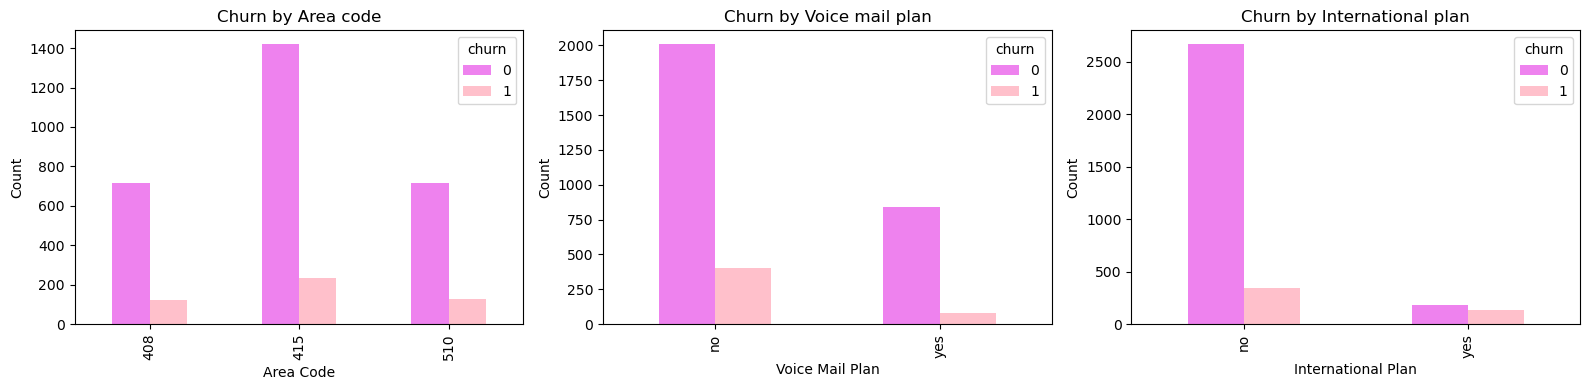

In [317]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Group by "area code" and "churn", then unstack and plot
churn_data.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by "voice mail plan" and "churn", then unstack and plot
churn_data.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice mail plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by "international plan" and "churn", then unstack and plot
churn_data.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

1. Analysis of Area Codes.
   - There is notable variation in churn rates across different area codes.
   - Area code 415 has the highest churn rate, whereas area code 408 has the lowest.
   - Although area codes 510 and 408 show fewer instances of churn, it is essential to consider the size of the customer base in each area code for a comprehensive understanding.

2. Assessment of International Plan.
   - SyriaTel offers an international calling plan to a customer base of under 500 users.
   - The churn rate among customers with this international plan closely matches the number of subscribers, indicating a significant risk of churn within this group.

3. Evaluation of Voice Mail Plan.
   - SyriaTel provides an optional voice mail plan to its customers.
   - A large number of customers have not subscribed to the voice mail plan.
   - Customers who have subscribed to the voice mail plan show a lower probability of churn compared to those who have not.


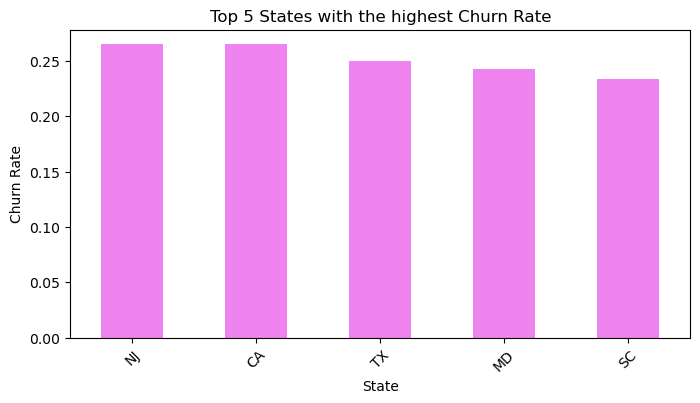

In [318]:
# Calculate churn rate for each state
state_churnr = churn_data.groupby('state')['churn'].mean().sort_values(ascending=False)

# Get the top states with the highest churn rate
top_statechr = state_churnr.head(5)  # Change 5 to the desired number of states

# Plot the top states with the highest churn rate
plt.figure(figsize=(8, 4))
top_statechr.plot(kind='bar', color='violet')  # Incorporate the color #1c3a96
plt.title('Top 5 States with the highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top 5 states with the highest churn rate are: New Jersey, California, Texas, Maryland and South Carolina.

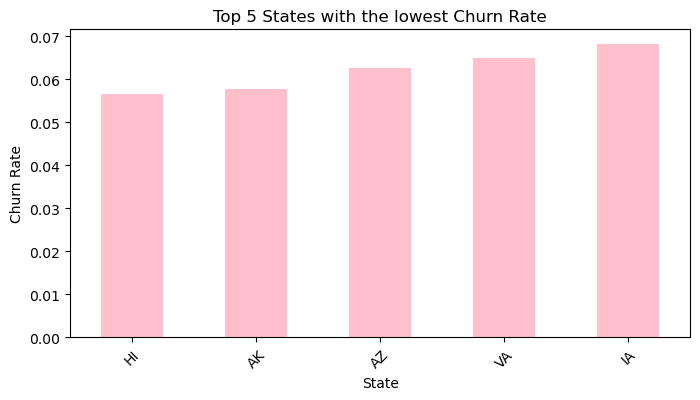

In [319]:
# Calculate churn rate for each state
state_churn_rate = churn_data.groupby('state')['churn'].mean().sort_values()

# Get the top states with the lowest churn rate
bottom_stateschr = state_churn_rate.head(5)  # Change 5 to the desired number of states

# Plot the top states with the lowest churn rate
plt.figure(figsize=(8, 4))
bottom_stateschr.plot(kind='bar', color='pink')  # Incorporate the color #1c3a96
plt.title('Top 5 States with the lowest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


The top 5 states with the low churn rates are Hawaii, Alaska, Arizona, Virginia, Louisiana.

2. Bivariate Analysis

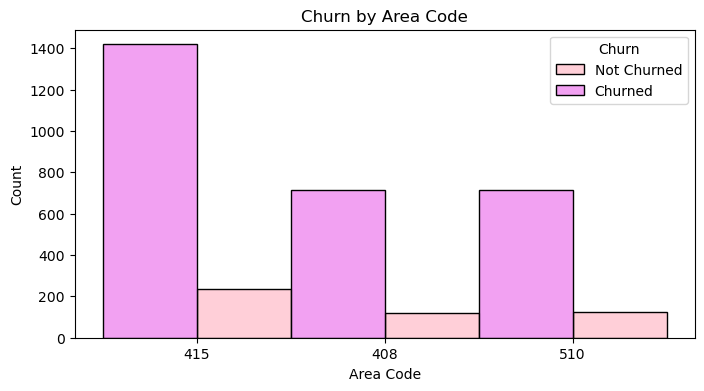

There are 3 area codes: 408, 415, 510 represented as 0, 1, 2


In [320]:
# Define the colors
colors = ['violet', 'pink']

# Set the color palette
sns.set_palette(sns.color_palette(colors))

# Plot churn by area codes
plt.figure(figsize=(8, 4))
sns.histplot(data=churn_data, x='area code', hue='churn', multiple='dodge', palette=colors)

# Add a legend with custom labels
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjust labels
plt.xlabel('Area Code')
plt.ylabel('Count')

# Title
plt.title('Churn by Area Code')

# Show plot
plt.show()

print('There are 3 area codes: 408, 415, 510 represented as 0, 1, 2')


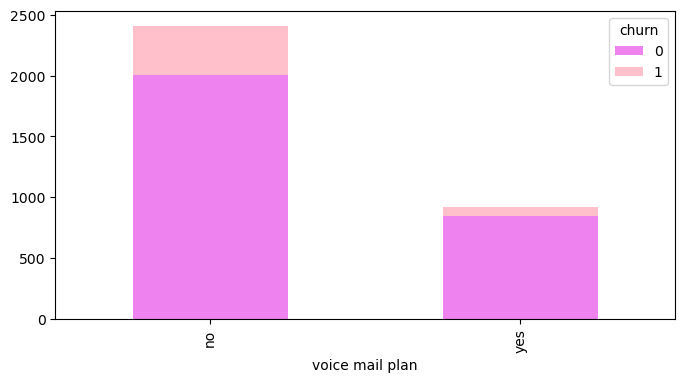

The percentage of customers subscribed to the voice mail plan is 27.66%
The percentage of subscribed customers who churned with voice mail plan is 8.68%


In [321]:
#function for diff plan
def churn_vs_plan(data, plan_column):
    # Plotting the churn vs plan
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(8,4))
    plt.show()

    # Calculating the percentage of customers subscribed to the plan
    tot_customers = len(data)
    tot_subscribed = sum(data[plan_column] == 'yes')
    percent_subscribed = (tot_subscribed / tot_customers) * 100
    print('The percentage of customers subscribed to the {} is {:.2f}%'.format(plan_column, percent_subscribed))

    # Calculating the percentage of churned customers among those subscribed to the plan
    churned_with_plan = sum((data[plan_column] == 'yes') & (data['churn'] == True))
    percent_churned_with_plan = (churned_with_plan / tot_subscribed) * 100
    print('The percentage of subscribed customers who churned with {} is {:.2f}%'.format(plan_column, percent_churned_with_plan))
# voice mail plan
churn_vs_plan(churn_data,'voice mail plan')

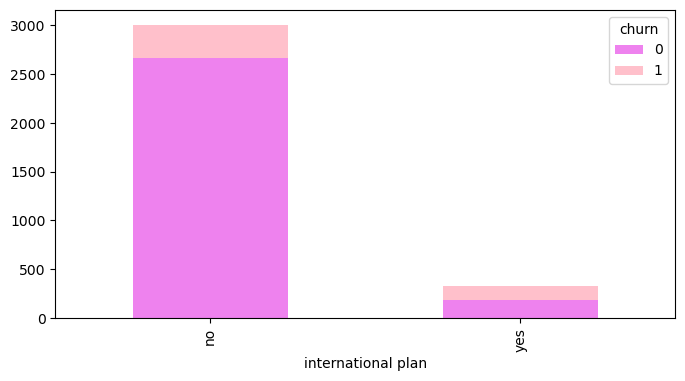

The percentage of customers subscribed to the international plan is 9.69%
The percentage of subscribed customers who churned with international plan is 42.41%


In [322]:
churn_vs_plan(churn_data,'international plan')

# Data Processing 

1. Label encoding

Here we convert the categorical data into numerical values by assigning each unique category a distinct integer (0 / 1)


In [323]:
# Categorical columns
cat_cols= ["international plan", "voice mail plan", "churn"]

# Apply label encoding
def label_encoding(col_name):
  le = LabelEncoder()
  churn_data[col_name] = le.fit_transform(churn_data[col_name])

# Call the label_encoding function for each
for col_name in cat_cols:
  label_encoding(col_name)


In [324]:
churn_data.dtypes

state                      object
account length              int64
area code                  object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
dtype: object

2. One hot coding

In [325]:
# Create an instance of the OneHotEncoder
encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

# Encode the "state" column
encoded_state = encod.fit_transform(churn_data[["state"]])

# Create a DataFrame with the encoded state columns
dupdf_state = pd.DataFrame(encoded_state, columns=encod.get_feature_names_out(["state"]))

# Concatenate the encoded state columns with the original DataFrame
he_df= pd.concat([churn_data, dupdf_state], axis=1)

# Remove the original "state" column
he_df = he_df.drop(["state"], axis=1)

ohe_df.head(5)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0


In [326]:
# Encode the "area code" column
encod_ac = encod.fit_transform(churn_data[["area code"]])

# Create a DataFrame with the encoded area code columns
dupdf_state = pd.DataFrame(encod_ac, columns=encod.get_feature_names_out(["area code"]))

# Concatenate the encoded area code columns with the original DataFrame
he_df = pd.concat([he_df, dupdf_state], axis=1)

# Remove the original "area code" column
he_df = he_df.drop(["area code"], axis=1)

he_df.head(5)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


3. Scaling

In [327]:
# Current df
cdf = he_df
cdf

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,...,0,0,0,0,0,0,0,0,1,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,...,0,0,0,0,0,1,0,0,1,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,...,0,0,0,0,0,0,0,0,0,1
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,...,0,0,0,0,0,0,0,0,0,1


In [328]:
col_names = cdf.columns.to_list()
print(col_names)

['account length', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'area code_408', 'a

In [329]:
# Drop any non-numeric columns from numeric_columns
numeric_cols = [col for col in cdf.columns if cdf[col].dtype != 'object']

# Clean numeric columns by replacing NaNs with mean values
cdf[numeric_cols] = cdf[numeric_cols].fillna(cdf[numeric_cols].mean())

# Convert any non-numeric values to numeric or NaN
cdf[numeric_cols] = cdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df1 = cdf.dropna(subset=numeric_cols)

# Initialize MinMaxScaler 
scaler = MinMaxScaler()  

if len(numeric_cols) == 0:
    print("No numeric columns found")

In [330]:

# Define your columns
numeric_cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']
binary_cols = ['international plan', 'voice mail plan']

# Scale numeric columns
scaler = StandardScaler()
scaled_numeric_cols = scaler.fit_transform(cdf[numeric_cols])
cdf_scaled = pd.DataFrame(scaled_numeric_cols, columns=numeric_cols)

# Check if 'number vmail messages' exists in numeric_cols
if 'number vmail messages' in numeric_cols:
    # Concatenate scaled numeric columns with binary columns
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols]], axis=1)
else:
    print("'number vmail messages' column not found in numeric_columns.")

# Check if 'area code' is in df1 before using it
if 'area code' in cdf.columns:
    # Create an instance of the OneHotEncoder with the correct parameter
    encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

    # Fit and transform the "area code" column
    encod_ac = encod.fit_transform(cdf[["area code"]])

    # Create a DataFrame with the encoded area code columns
    encoded_ac_df = pd.DataFrame(encod_ac, columns=encod.get_feature_names_out(["area code"]))

    # Concatenate the encoded area code columns with the original DataFrame
    cdf = pd.concat([cdf, encoded_ac_df], axis=1)

    # Drop the original "area code" column if necessary
    cdf.drop("area code", axis=1, inplace=True)

# Concatenate binary columns if they exist
if set(binary_cols).issubset(cdf.columns):
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols]], axis=1)

# Display the updated DataFrame
print(cdf_scaled)


'number vmail messages' column not found in numeric_columns.
      total day minutes  total eve minutes  total night minutes  \
0              1.566767          -0.070610             0.866743   
1             -0.333738          -0.108080             1.058571   
2              1.168304          -1.573383            -0.756869   
3              2.196596          -2.742865            -0.078551   
4             -0.240090          -1.038932            -0.276311   
...                 ...                ...                  ...   
3328          -0.432895           0.286348             1.547039   
3329           0.942447          -0.938353            -0.189297   
3330           0.018820           1.731930            -0.177431   
3331           0.624778          -0.816080            -1.219628   
3332           1.003042           1.280309             0.801482   

      total intl minutes  international plan  voice mail plan  
0              -0.085008                   0                1  
1     

In [331]:
# Drop any non-numeric columns from numeric_columns
numeric_cols = [col for col in numeric_cols if cdf[col].dtype != 'object']

# Clean numeric columns by replacing NaNs with mean values
cdf[numeric_cols] = cdf[numeric_cols].fillna(cdf[numeric_cols].mean())

# Convert any non-numeric values to numeric or NaN
cdf[numeric_cols] = cdf[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
cdf = cdf.dropna(subset=numeric_cols)

# Initialize MinMaxScaler 
scaler = MinMaxScaler()  

if len(numeric_cols) == 0:
    print("No numeric columns found.")
else:
    # Scale the numeric columns
    cdf[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# Convert scaled data to a DataFrame
cdf_scaled = pd.DataFrame(df1[numeric_cols], columns=numeric_cols)

# Define binary columns
binary_cols = ['area code', 'churn', 'international plan', 'voice mail plan',
               'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
               'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL',
               'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
               'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
               'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO',
               'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
               'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
               'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
               'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
               'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY']

# Check if 'number vmail messages' exists in numeric_columns
if 'number vmail messages' in numeric_cols:
    # Concatenate scaled numeric columns with binary columns
    cdf_scaled = pd.concat([cdf_scaled, df1[binary_cols]], axis=1)
else:
    print("'number vmail messages' column not found in numeric_columns.")


'number vmail messages' column not found in numeric_columns.


In [332]:
cdf.dtypes

account length             int64
international plan         int32
voice mail plan            int32
number vmail messages      int64
total day minutes        float64
                          ...   
state_WV                   int64
state_WY                   int64
area code_408              int64
area code_415              int64
area code_510              int64
Length: 72, dtype: object

Splitting data

In [333]:

# Define your columns
numeric_cols = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'number vmail messages']
binary_cols = ['international plan', 'voice mail plan']

# Ensure 'churn' is in the DataFrame
if 'churn' not in cdf.columns:
    raise KeyError("'churn' column not found in the original DataFrame")

# Scale numeric columns
scaler = StandardScaler()
scaled_numeric_cols = scaler.fit_transform(cdf[numeric_cols])
cdf_scaled = pd.DataFrame(scaled_numeric_cols, columns=numeric_cols)

# Concatenate scaled numeric columns with binary columns if they exist
if set(binary_cols).issubset(cdf.columns):
    cdf_scaled = pd.concat([cdf_scaled, cdf[binary_cols].reset_index(drop=True)], axis=1)

# Check if 'area code' is in df1 before using it
if 'area code' in cdf.columns:
    # Create an instance of the OneHotEncoder with the correct parameter
    encod = OneHotEncoder(dtype=np.int64, sparse_output=False)

    # Fit and transform the "area code" column
    encoded_ac = encod.fit_transform(cdf[["area code"]])

    # Create a DataFrame with the encoded area code columns
    encoded_ac_df = pd.DataFrame(encoded_ac, columns=encod.get_feature_names_out(["area code"]))

    # Concatenate the encoded area code columns with the original DataFrame
    cdf = pd.concat([df1, encoded_ac_df], axis=1)

    # Drop the original "area code" column if necessary
    df1.drop("area code", axis=1, inplace=True)

# Ensure the 'churn' column is added to the final DataFrame
cdf_scaled['churn'] = df1['churn'].reset_index(drop=True)

# Specify features (X) and target variable (y)
X = cdf_scaled.drop(columns=['churn'])  # Features
y = cdf_scaled['churn']  # Target variable

# Split the data into training and testing sets (train-test split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the updated DataFrame
print(cdf_scaled.head())


   total day minutes  total eve minutes  total night minutes  \
0           1.566767          -0.070610             0.866743   
1          -0.333738          -0.108080             1.058571   
2           1.168304          -1.573383            -0.756869   
3           2.196596          -2.742865            -0.078551   
4          -0.240090          -1.038932            -0.276311   

   total intl minutes  number vmail messages  international plan  \
0           -0.085008               1.234883                   0   
1            1.240482               1.307948                   0   
2            0.703121              -0.591760                   0   
3           -1.303026              -0.591760                   1   
4           -0.049184              -0.591760                   1   

   voice mail plan  churn  
0                1      0  
1                1      0  
2                0      0  
3                0      0  
4                0      0  


In [334]:
# Specify features (X) and target variable (y)
X = cdf_scaled.drop(columns=['churn'])  # Features
y = cdf_scaled['churn']  # Target variable

# Split the data into training and testing sets (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 2666
Test set size: 667


Handle imbalance

In [335]:
oversample = SMOTE()

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

(4568, 7) (4568,)


In [336]:
y_train_smote.value_counts()

churn
0    2284
1    2284
Name: count, dtype: int64

# Modelling

Baseline model: Logistic Regression

In [337]:
# Define the logistic regression model within a pipeline
model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

# Perform k-fold cross-validation on the training set
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')

# Print cross-validation scores
print("Cross-val scores:", cv_scores)
print("Mean CV acc:", cv_scores.mean())

# Train the logistic regression model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Cross-val scores: [0.85018727 0.87054409 0.82926829 0.85928705 0.8836773 ]
Mean CV acc: 0.858592800275453

Logistic Regression Evaluation:
Accuracy: 0.856071964017991
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.60      0.15      0.24       101

    accuracy                           0.86       667
   macro avg       0.73      0.57      0.58       667
weighted avg       0.83      0.86      0.82       667



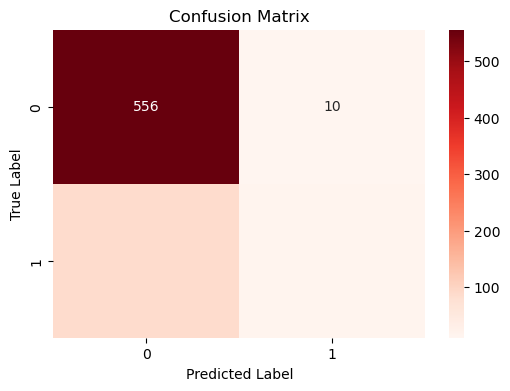

In [338]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Findings

XGboost Classifier

In [339]:
#  Initialize the XGBoost model
xgbm = xgb.XGBClassifier()

# Train the XGBoost model
xgbm.fit(X_train, y_train)

# Make predictions with XGBoost
y_predx = xgbm.predict(X_test)

# Evaluate XGBoost model performance
acc_xgb = accuracy_score(y_test, y_predx)
print("\nXGBoost Accuracy:", acc_xgb)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_predx))


XGBoost Accuracy: 0.9085457271364318
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       566
           1       0.78      0.55      0.65       101

    accuracy                           0.91       667
   macro avg       0.85      0.76      0.80       667
weighted avg       0.90      0.91      0.90       667



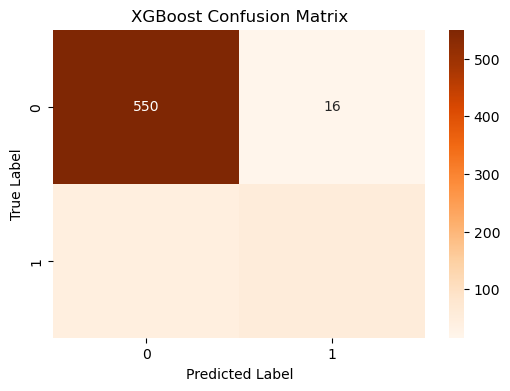

In [343]:
# Compute confusion matrix for XGBoost model
conf_m = confusion_matrix(y_test, y_predx)

# Plot confusion matrix for XGBoost model
plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

Findings

Gradient Boosting Model

In [344]:
# Build GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9145427286356822
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.91      0.49      0.63       101

    accuracy                           0.91       667
   macro avg       0.91      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



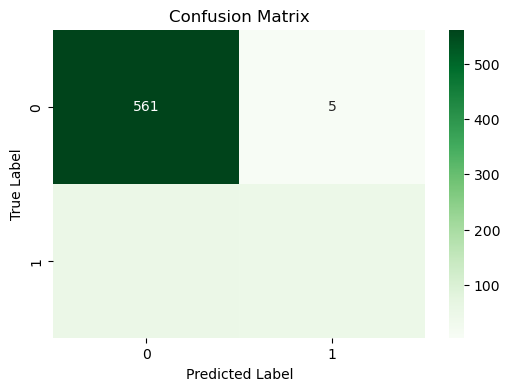

In [347]:
# Compute confusion matrix
conf_m = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()